# PROJET 3 : APPLICATION DE SANTE PUBLIQUE (EXPLORATION)

*Mathieu GENTHON (mars-avril 2020)*

## SOMMAIRE<a class="anchor" id="sommaire"></a>
### 1 - [Importation des librairies et chargement des dataframes nettoyés](#1)<a class="anchor" id="sommaire"></a>
### 2 - [Analyse univarié](#2)<a class="anchor" id="sommaire"></a>
#### 2.2 - [Principales variables nutritionnelles](#22)<a class="anchor" id="sommaire"></a>
#### 2.3 - [Répartition des produits par nutriscore](#23)<a class="anchor" id="sommaire"></a>
### 3 - [Analyse bivarié](#3)<a class="anchor" id="sommaire"></a>
#### 3.1 - [Matrice des corrélations](#31)<a class="anchor" id="sommaire"></a>
#### 3.2 - [ACP](#32)<a class="anchor" id="sommaire"></a>
#### 3.3 - [ANOVA](#33)<a class="anchor" id="sommaire"></a>
#### 3.4 - [kNN](#34)<a class="anchor" id="sommaire"></a>

### 1 - [Importation des librairies et chargement dataframe](#1)<a class="anchor" id="1"></a>

In [1]:
# On importe les librairies dont on devrait avoir besoin pour le projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
from FunctionsACP import *
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None) # On affiche toutes les colonnes des df
pd.options.display.max_rows = 100

In [2]:
# On charge les données depuis des fichiers en local et on crée des data frame pour chaque fichier.
path='C:/Users/GENTHON-M/Documents/formation/Open Classrooms/3-Santé publique/'
nrows = None
df_score = pd.read_csv(path+"df_score.csv", sep='\t', nrows=nrows, low_memory=False, encoding='utf-8')
df_score.shape

(63803, 12)

In [77]:
df_score.head(100)

,product_name,nutriscore_grade,code,energy-kcal_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,proteins_100g,carbohydrates_100g,sugars_100g,fiber_100g
0,moutarde au moût de raisin,d,0000000000100,223.51680,8.2,2.2,4.6000,1.811024,5.1,29.0,22.0,0.0
1,Compote de poire,a,0000000001885,657.00000,0.0,0.0,0.0000,0.000000,0.6,36.0,27.0,3.6
2,Baguette Poitevin,NaN,0000000002264,866.00000,6.7,3.8,0.4000,0.160000,8.9,27.5,0.6,1.7
3,Suedois saumon,NaN,0000000003827,720.00000,4.4,1.2,3.5800,1.432000,8.4,23.3,4.6,2.7
4,Salade shaker taboulé,NaN,0000000004510,477.00000,8.1,0.9,0.3100,0.124000,3.9,5.7,1.4,1.7
5,Fromage blanc à la creme de marron,NaN,0000000004794,628.00000,5.9,3.7,0.3400,0.136000,5.1,18.6,17.4,0.6
6,Sandwich solene céréales sicilien,NaN,0000000005272,891.00000,6.2,0.8,5.3900,2.156000,8.1,30.0,1.7,3.1
7,BAguette bressan,a,0000000005470,669.00000,2.2,0.5,0.3580,0.143200,9.5,25.2,0.6,1.6
8,Fromage blanc à la crème de marron,NaN,0000000034791,640.00000,5.8,3.9,0.1000,0.040000,4.4,20.0,16.3,10.0
9,Blanquette de Volaille et son Riz,b,0000000274722,107.46000,2.2,0.9,0.7000,0.280000,6.8,15.3,0.5,0.5


### 2 - [Analyse univarié](#2)<a class="anchor" id="2"></a>

#### 2.1 - [Principales variables nutritionnelles](#21)<a class="anchor" id="21"></a>

In [4]:
# On va tracer la répartition de nos macros nutriments et de l'énergie
df_useful_boxplot_comp = df_score.loc[:,['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g',
                                    'proteins_100g','salt_100g','sodium_100g']]
df_useful_boxplot_energy = df_score.loc[:,['energy-kcal_100g']]
df_useful_boxplot_comp.shape

(63803, 8)

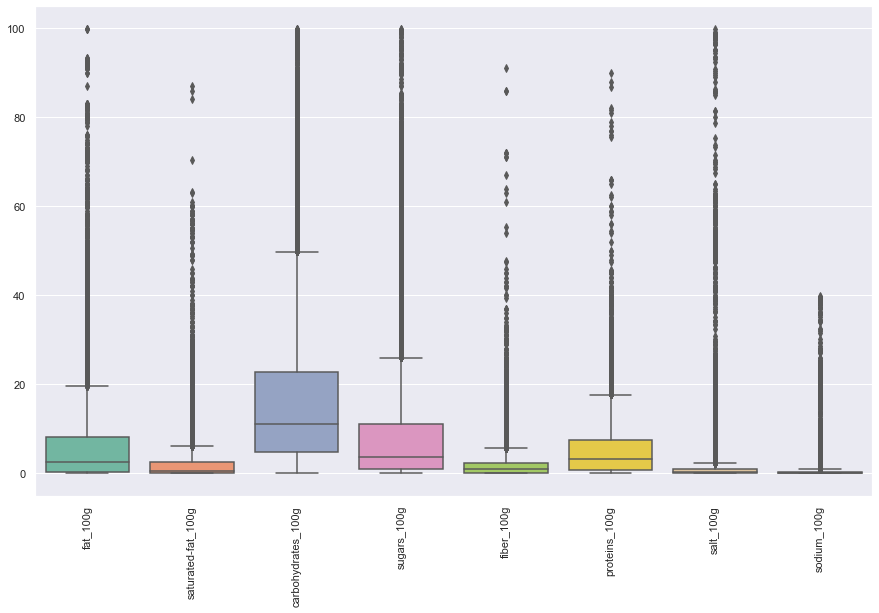

In [5]:
ax = sns.boxplot(data=df_useful_boxplot_comp, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.gcf().set_size_inches(15, 9)

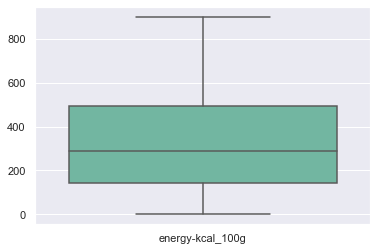

In [6]:
ax = sns.boxplot(data=df_useful_boxplot_energy, orient="v", palette="Set2")

#### 2.2 - [Répartition des produits par nutriscore](#22)<a class="anchor" id="22"></a>

In [7]:
# Les taux de remplissage des macros nutriments sont similaires. sélectionnons uniquement les aliments pour lesquels nous
# nous avons des données.
df_nutriscore = df_score[['nutriscore_grade','code']].copy()            
df_nutriscore.dropna(inplace=True)
df_nutriscore.shape
#Seulement 1/3 des lignes environ possede un nutriscore ce qui correspond au calcul du taux de remplissage.

(47876, 2)

In [8]:
# Répartition des produits par nutriscore
RepartitionProduitNutriscore = df_nutriscore.groupby('nutriscore_grade')['code'].nunique()
RepartitionProduitNutriscore

nutriscore_grade
a    11496
b    10325
c    11842
d     7979
e     6234
Name: code, dtype: int64

In [9]:
ListeNutriscore = df_nutriscore['nutriscore_grade'].unique()
ListeNutriscore.sort()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

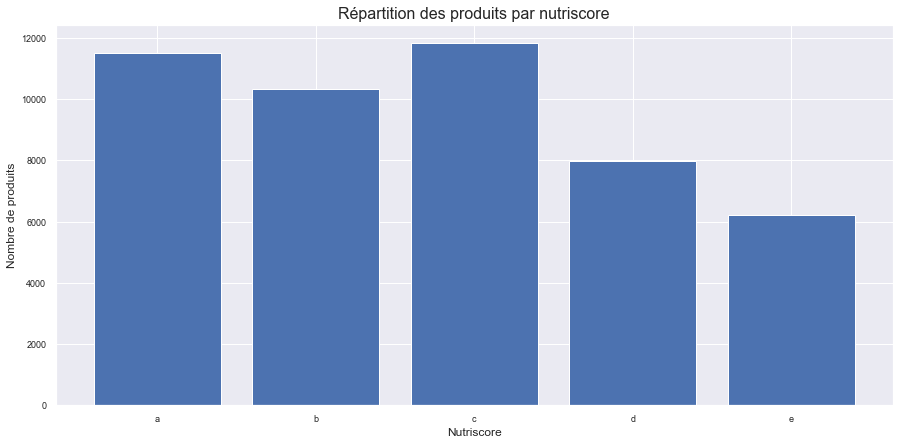

In [10]:
fig = plt.figure(figsize=(15,7))
axes = plt.axes()
axes.set_xlabel('Nutriscore', fontsize = 12)
axes.set_ylabel('Nombre de produits', fontsize = 12)
#axes.set_ylim(0,1200)
plt.title('Répartition des produits par nutriscore', fontsize = 16)
plt.bar(ListeNutriscore,RepartitionProduitNutriscore)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

### 3  - [Analyse bivarié](#3)<a class="anchor" id="3"></a>

#### 3.1  - [Matrice des corrélations](#31)<a class="anchor" id="31"></a>

In [11]:
df_useful_correlation = df_score.loc[:,['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g',
                                    'proteins_100g','salt_100g','sodium_100g','fiber_100g']]
df_useful_correlation

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g
0,223.5168,8.2,2.20,29.0,22.0,5.1,4.6000,1.811024,0.0
1,657.0000,0.0,0.00,36.0,27.0,0.6,0.0000,0.000000,3.6
2,866.0000,6.7,3.80,27.5,0.6,8.9,0.4000,0.160000,1.7
3,720.0000,4.4,1.20,23.3,4.6,8.4,3.5800,1.432000,2.7
4,477.0000,8.1,0.90,5.7,1.4,3.9,0.3100,0.124000,1.7
...,...,...,...,...,...,...,...,...,...
63798,318.0000,0.0,0.00,12.0,11.7,7.1,0.1000,0.040000,0.0
63799,5.0148,0.2,0.20,0.5,0.5,0.5,0.0254,0.010160,0.2
63800,188.0000,0.1,0.10,9.9,9.3,0.4,0.0100,0.004000,1.2
63801,251.0000,0.9,0.13,12.0,10.0,0.6,0.0000,0.000000,0.5


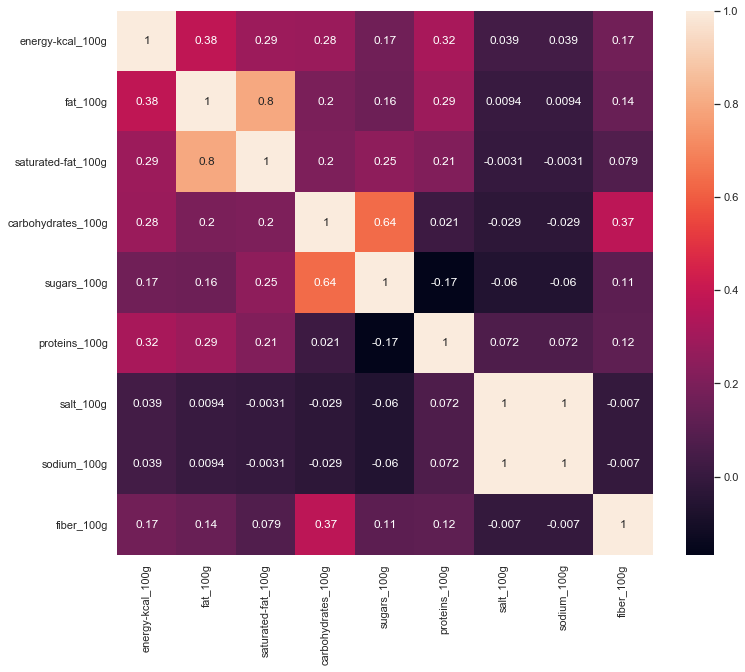

In [12]:
corrMatrix = df_useful_correlation.corr()
sns.heatmap(corrMatrix, annot=True)
plt.gcf().set_size_inches(12, 10)

#### 3.2  - [ACP](#32)<a class="anchor" id="32"></a>

In [13]:
df_score

,product_name,nutriscore_grade,code,energy-kcal_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,proteins_100g,carbohydrates_100g,sugars_100g,fiber_100g
0,moutarde au moût de raisin,d,0000000000100,223.5168,8.2,2.20,4.6000,1.811024,5.1,29.0,22.0,0.0
1,Compote de poire,a,0000000001885,657.0000,0.0,0.00,0.0000,0.000000,0.6,36.0,27.0,3.6
2,Baguette Poitevin,NaN,0000000002264,866.0000,6.7,3.80,0.4000,0.160000,8.9,27.5,0.6,1.7
3,Suedois saumon,NaN,0000000003827,720.0000,4.4,1.20,3.5800,1.432000,8.4,23.3,4.6,2.7
4,Salade shaker taboulé,NaN,0000000004510,477.0000,8.1,0.90,0.3100,0.124000,3.9,5.7,1.4,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...
63798,Deli'light fromage blanc saveur vanille 0%,a,990530101006696528,318.0000,0.0,0.00,0.1000,0.040000,7.1,12.0,11.7,0.0
63799,Thé vert Earl grey,NaN,99111250,5.0148,0.2,0.20,0.0254,0.010160,0.5,0.5,0.5,0.2
63800,"Jus de fruit Innocent pomme ,peche et poire",b,9938809161503,188.0000,0.1,0.10,0.0100,0.004000,0.4,9.9,9.3,1.2
63801,Innocent super smoothie énergisé,NaN,9957859639831,251.0000,0.9,0.13,0.0000,0.000000,0.6,12.0,10.0,0.5


In [14]:
# Les taux de remplissage des macros nutriments sont similaires. sélectionnons uniquement les aliments pour lesquels nous
# nous avons des données.
acp_col = ['product_name','nutriscore_grade','energy-kcal_100g', 'fat_100g','saturated-fat_100g','salt_100g','sodium_100g',
              'proteins_100g', 'carbohydrates_100g','sugars_100g','fiber_100g']
df_acp = df_score[acp_col].copy()
df_acp.dropna(inplace=True)
df_acp.set_index(['product_name','nutriscore_grade'],inplace=True)
df_acp

,,energy-kcal_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,proteins_100g,carbohydrates_100g,sugars_100g,fiber_100g
product_name,nutriscore_grade,,,,,,,,,
moutarde au moût de raisin,d,223.5168,8.20,2.20,4.600,1.811024,5.10,29.0,22.00,0.0
Compote de poire,a,657.0000,0.00,0.00,0.000,0.000000,0.60,36.0,27.00,3.6
BAguette bressan,a,669.0000,2.20,0.50,0.358,0.143200,9.50,25.2,0.60,1.6
Blanquette de Volaille et son Riz,b,107.4600,2.20,0.90,0.700,0.280000,6.80,15.3,0.50,0.5
Raviolini au Fromage de chèvre et Pesto,b,108.6540,4.20,2.10,0.600,0.240000,4.40,12.5,1.40,1.8
...,...,...,...,...,...,...,...,...,...,...
Pizza,b,0.0000,0.00,0.00,0.000,0.000000,0.00,0.0,0.00,0.0
Pur jus de pomme,e,180.0000,0.00,0.00,0.010,0.004000,0.10,10.7,10.10,0.0
Noisettes,a,627.8052,60.75,4.46,0.000,0.000000,14.95,16.7,4.34,9.7


In [15]:
#On renomme les colonnes pour avoir un cercle des corrélations plus lisibles
df_acp.columns = ['Nrj','Fat','S-Fat','Salt','Na','Prot','CarHyd','Sugar','Fib']
#'S-Fat','Sugar'
df_acp.reset_index(level='nutriscore_grade',inplace = True)
df_acp


,nutriscore_grade,Nrj,Fat,S-Fat,Salt,Na,Prot,CarHyd,Sugar,Fib
product_name,,,,,,,,,,
moutarde au moût de raisin,d,223.5168,8.20,2.20,4.600,1.811024,5.10,29.0,22.00,0.0
Compote de poire,a,657.0000,0.00,0.00,0.000,0.000000,0.60,36.0,27.00,3.6
BAguette bressan,a,669.0000,2.20,0.50,0.358,0.143200,9.50,25.2,0.60,1.6
Blanquette de Volaille et son Riz,b,107.4600,2.20,0.90,0.700,0.280000,6.80,15.3,0.50,0.5
Raviolini au Fromage de chèvre et Pesto,b,108.6540,4.20,2.10,0.600,0.240000,4.40,12.5,1.40,1.8
...,...,...,...,...,...,...,...,...,...,...
Pizza,b,0.0000,0.00,0.00,0.000,0.000000,0.00,0.0,0.00,0.0
Pur jus de pomme,e,180.0000,0.00,0.00,0.010,0.004000,0.10,10.7,10.10,0.0
Noisettes,a,627.8052,60.75,4.46,0.000,0.000000,14.95,16.7,4.34,9.7


In [16]:
df_anova = df_acp.copy()
df_acp_grade = df_acp['nutriscore_grade']

In [17]:
df_acp.drop(['nutriscore_grade'], axis=1, inplace = True)
df_acp

,Nrj,Fat,S-Fat,Salt,Na,Prot,CarHyd,Sugar,Fib
product_name,,,,,,,,,
moutarde au moût de raisin,223.5168,8.20,2.20,4.600,1.811024,5.10,29.0,22.00,0.0
Compote de poire,657.0000,0.00,0.00,0.000,0.000000,0.60,36.0,27.00,3.6
BAguette bressan,669.0000,2.20,0.50,0.358,0.143200,9.50,25.2,0.60,1.6
Blanquette de Volaille et son Riz,107.4600,2.20,0.90,0.700,0.280000,6.80,15.3,0.50,0.5
Raviolini au Fromage de chèvre et Pesto,108.6540,4.20,2.10,0.600,0.240000,4.40,12.5,1.40,1.8
...,...,...,...,...,...,...,...,...,...
Pizza,0.0000,0.00,0.00,0.000,0.000000,0.00,0.0,0.00,0.0
Pur jus de pomme,180.0000,0.00,0.00,0.010,0.004000,0.10,10.7,10.10,0.0
Noisettes,627.8052,60.75,4.46,0.000,0.000000,14.95,16.7,4.34,9.7


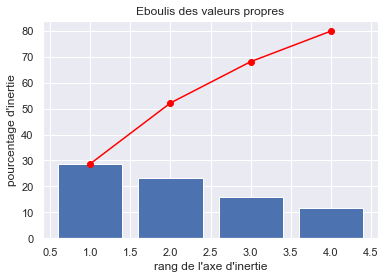

In [18]:
# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_acp

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
#names = df_acp.index # ou data.index pour avoir les intitulés
features = df_acp.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)



In [19]:
pca.explained_variance_ratio_[0] * 100

28.761735180741653

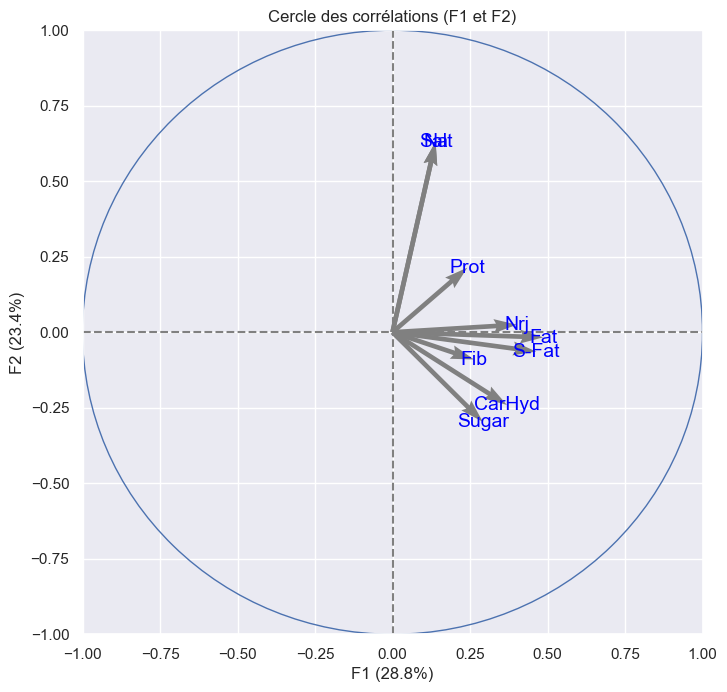

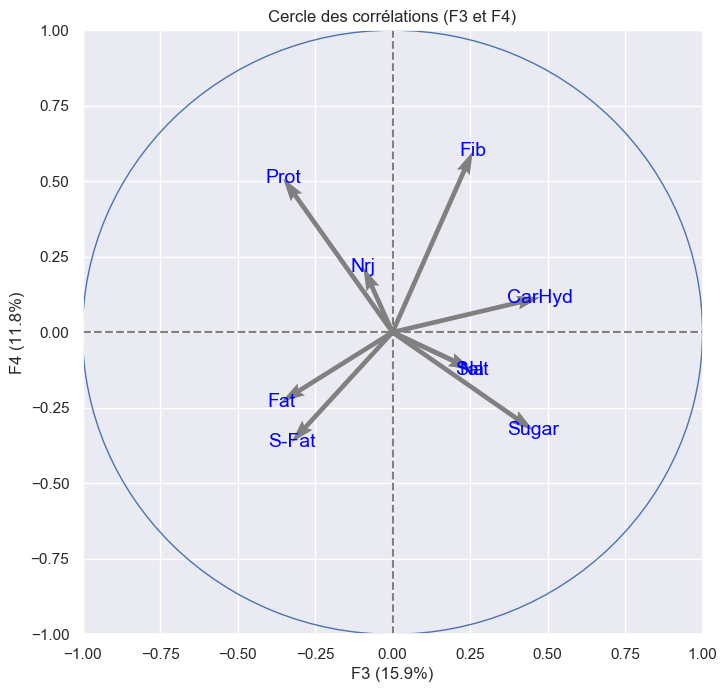

In [20]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

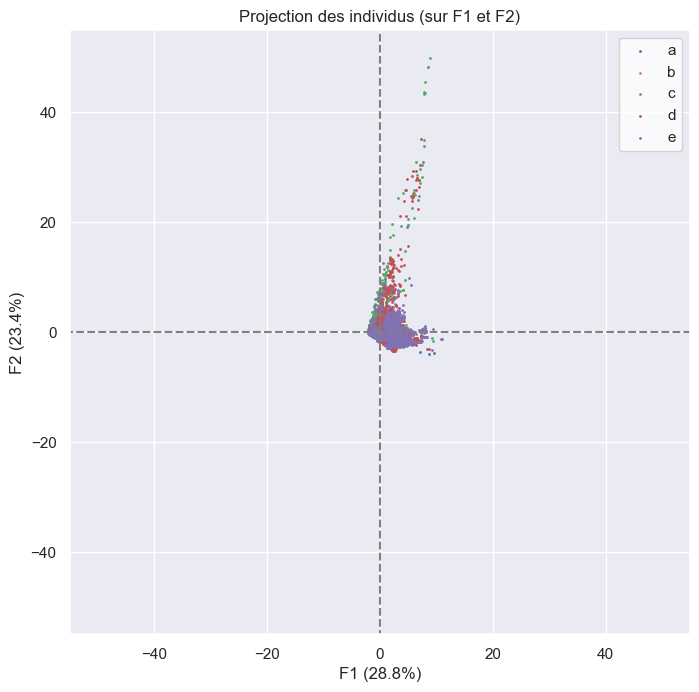

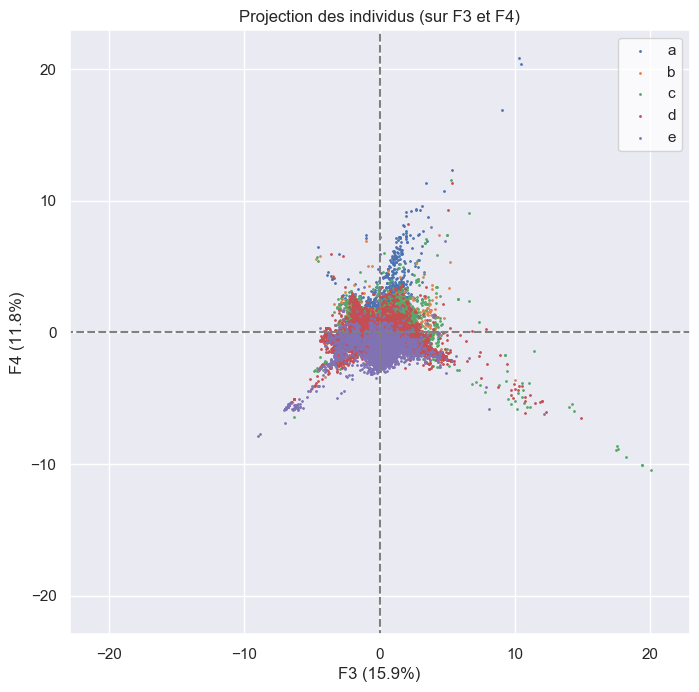

In [21]:
# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = df_acp_grade, alpha = 1)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = df_acp_grade, alpha = 1)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels = np.array(names))


In [22]:
# Transformation en DataFrame pandas
df_PCA = pd.DataFrame({
    "Dim1" : X_projected[:,0], 
    "Dim2" : X_projected[:,1],
    "Dim3" : X_projected[:,2], 
    "Dim4" : X_projected[:,3],
    "Nutriscore" : df_acp_grade
})

# Résultat (premières lignes)
df_PCA.head(20)

,Dim1,Dim2,Dim3,Dim4,Nutriscore
product_name,,,,,
moutarde au moût de raisin,0.498785,1.539939,1.335201,-1.187207,d
Compote de poire,0.631018,-1.159497,1.563194,0.420543,a
BAguette bressan,0.179698,0.098139,-0.318113,1.129930,a
Blanquette de Volaille et son Riz,-1.126151,0.271494,-0.234599,0.014566,b
Raviolini au Fromage de chèvre et Pesto,-0.920957,0.089489,-0.166237,-0.018175,b
Entremets Crème Brulée,3.547947,-2.182099,2.224286,-2.110650,b
Root Beer,-1.422484,0.271375,0.182373,-0.449767,e
"Pepsi, Nouveau goût !",-1.664445,-0.436729,0.330936,-0.791129,e
"Pavés de saumon, nature",0.378561,0.613704,-1.970716,1.184789,a


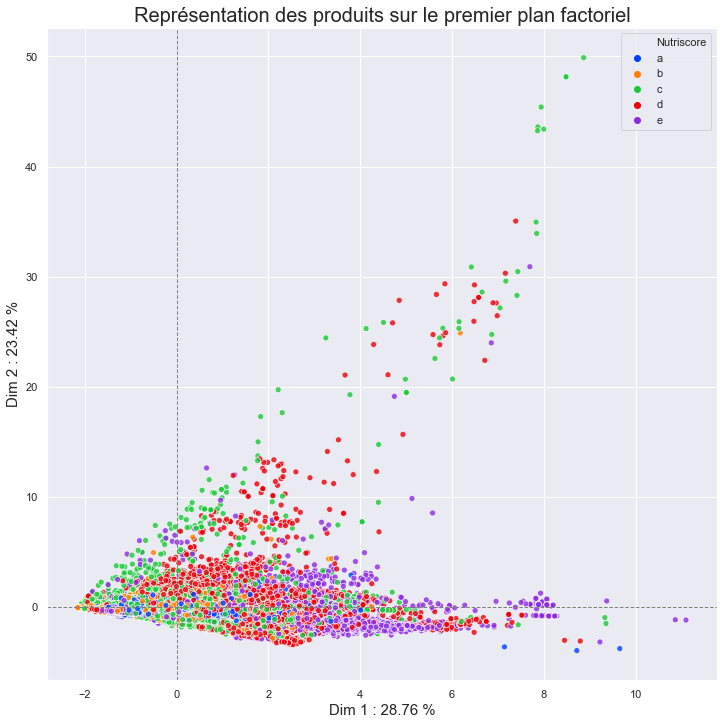

In [23]:
fig = plt.figure(figsize=(12,12))
g_pca = sns.scatterplot(x="Dim1",y="Dim2",hue = "Nutriscore",data = df_PCA, hue_order =['a','b','c','d','e'],
                        palette='bright',alpha=0.8)
plt.title("Représentation des produits sur le premier plan factoriel", size=20)
g_pca.set_xlabel("Dim 1 : " + str(round(pca.explained_variance_ratio_[0] * 100,2)) + " %", fontsize=15)
g_pca.set_ylabel("Dim 2 : " + str(round(pca.explained_variance_ratio_[1] * 100,2)) + " %", fontsize=15)
plt.axvline(color='gray', linestyle='--', linewidth=1)
plt.axhline(color='gray', linestyle='--', linewidth=1)

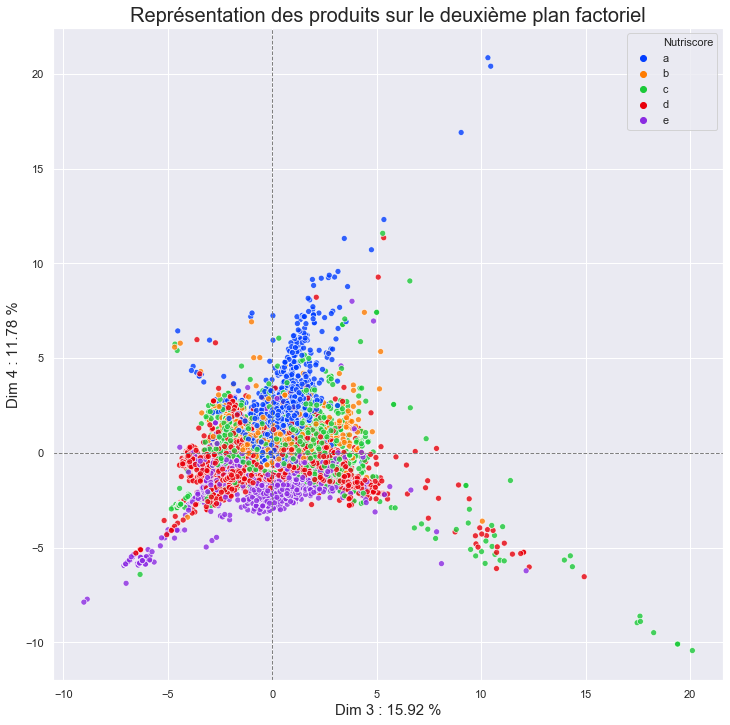

In [72]:
fig = plt.figure(figsize=(12,12))
g_pca = sns.scatterplot(x="Dim3",y="Dim4",hue = "Nutriscore",data = df_PCA, hue_order =['a','b','c','d','e'],
                        palette='bright',alpha=0.8)
plt.title("Représentation des produits sur le deuxième plan factoriel", size=20)
g_pca.set_xlabel("Dim 3 : " + str(round(pca.explained_variance_ratio_[2] * 100,2)) + " %", fontsize=15)
g_pca.set_ylabel("Dim 4 : " + str(round(pca.explained_variance_ratio_[3] * 100,2)) + " %", fontsize=15)
plt.axvline(color='gray', linestyle='--', linewidth=1)
plt.axhline(color='gray', linestyle='--', linewidth=1)

#### 3.3  - [ANOVA](#33)<a class="anchor" id="33"></a>

In [25]:
df_anova

,nutriscore_grade,Nrj,Fat,S-Fat,Salt,Na,Prot,CarHyd,Sugar,Fib
product_name,,,,,,,,,,
moutarde au moût de raisin,d,223.5168,8.20,2.20,4.600,1.811024,5.10,29.0,22.00,0.0
Compote de poire,a,657.0000,0.00,0.00,0.000,0.000000,0.60,36.0,27.00,3.6
BAguette bressan,a,669.0000,2.20,0.50,0.358,0.143200,9.50,25.2,0.60,1.6
Blanquette de Volaille et son Riz,b,107.4600,2.20,0.90,0.700,0.280000,6.80,15.3,0.50,0.5
Raviolini au Fromage de chèvre et Pesto,b,108.6540,4.20,2.10,0.600,0.240000,4.40,12.5,1.40,1.8
...,...,...,...,...,...,...,...,...,...,...
Pizza,b,0.0000,0.00,0.00,0.000,0.000000,0.00,0.0,0.00,0.0
Pur jus de pomme,e,180.0000,0.00,0.00,0.010,0.004000,0.10,10.7,10.10,0.0
Noisettes,a,627.8052,60.75,4.46,0.000,0.000000,14.95,16.7,4.34,9.7


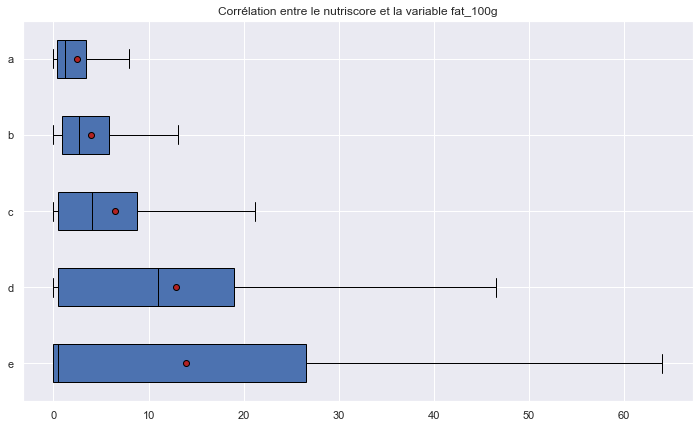

In [26]:
X = "nutriscore_grade" # qualitative
Y = "Fat" # quantitative

sous_echantillon = df_anova[[X,Y]].copy() 
modalites = df_anova[X].unique()
mod= sorted(modalites,reverse=True)
groupes = []
for m in mod:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(12,7))
plt.boxplot(groupes, labels=mod, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Corrélation entre le nutriscore et la variable fat_100g')
plt.show()

In [27]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.15939722125364458

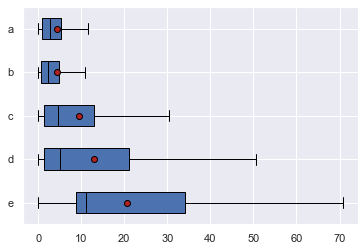

In [84]:
X = "nutriscore_grade" # qualitative
Ybis = "Sugar" # quantitative

sous_echantillon = df_anova[[X,Ybis]].copy() 
modalites = sorted((df_anova[X].unique()),reverse=True)
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Ybis])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [85]:
eta_squared(sous_echantillon[X],sous_echantillon[Ybis])

0.17537044068072355

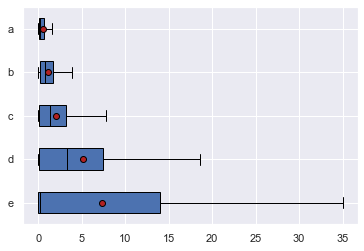

In [86]:
X = "nutriscore_grade" # qualitative
Yter = "S-Fat" # quantitative

sous_echantillon = df_anova[[X,Yter]].copy() 
modalites = sorted((df_anova[X].unique()),reverse=True)
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Yter])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [87]:
eta_squared(sous_echantillon[X],sous_echantillon[Yter])

0.20957983288507295

#### 3.4  - [kNN](#34)<a class="anchor" id="34"></a>

In [71]:
data = df_acp
target = df_acp_grade
data.head()

,Nrj,Fat,S-Fat,Salt,Na,Prot,CarHyd,Sugar,Fib
product_name,,,,,,,,,
moutarde au moût de raisin,223.5168,8.2,2.2,4.600,1.811024,5.1,29.0,22.0,0.0
Compote de poire,657.0000,0.0,0.0,0.000,0.000000,0.6,36.0,27.0,3.6
BAguette bressan,669.0000,2.2,0.5,0.358,0.143200,9.5,25.2,0.6,1.6
Blanquette de Volaille et son Riz,107.4600,2.2,0.9,0.700,0.280000,6.8,15.3,0.5,0.5
Raviolini au Fromage de chèvre et Pesto,108.6540,4.2,2.1,0.600,0.240000,4.4,12.5,1.4,1.8


In [59]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_encoded = le.fit_transform(target)

# Avant encodage
print("y avant encodage : " + " ".join([str(p) for p in target[:10]]))
# Après encodage
print("y après encodage : " + " ".join([str(p) for p in y_encoded[:10]]))

y avant encodage : d a a b b b e e a c
y après encodage : 3 0 0 1 1 1 4 4 0 2


In [60]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [61]:
from sklearn.preprocessing import StandardScaler
# Centrage - réduction des entrées
knn_scaler = StandardScaler().fit(xtrain)

X_train_std = knn_scaler.transform(xtrain)

X_test_std = knn_scaler.transform(xtest)

In [62]:
from sklearn import neighbors, metrics

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [64]:
error = 1 - knn.score(X_test_std, ytest)
print('Erreur: %f' % error)

Erreur: 0.202324


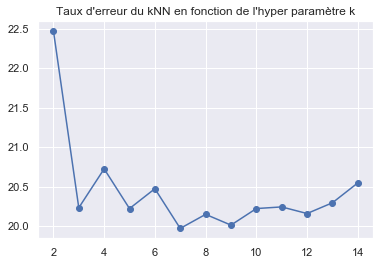

In [70]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_std, ytrain).score(X_test_std, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.title("Taux d'erreur du kNN en fonction de l'hyper paramètre k")
plt.show()

In [66]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(7)
knn.fit(X_train_std, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(X_test_std)

In [67]:
print("Résultat sur le jeu de test, accuracy = %0.3f" % metrics.accuracy_score(ytest, predicted))


Résultat sur le jeu de test, accuracy = 0.800
